In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import pynapple as nap

from scipy.stats import gaussian_kde

from spatial_manifolds.data.binning import get_bin_config
from spatial_manifolds.data.loading import load_session
from spatial_manifolds.detect_grids import *
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2


In [ ]:
mouse = 0
day = 0
session_type = 'OF1'
sorter = 'kilosort4'
storage = Path('/Users/harryclark/Downloads/COHORT12/')

alpha = 0.001
n_jobs = 8
n_shuffles = 100
seed = 1
class Args:
    def __init__(self,mouse,day,session_type,sorter,storage,alpha,n_jobs,n_shuffles,seed):
        self.mouse = mouse
        self.day = day
        self.session_type = session_type
        self.sorter = sorter
        self.storage = storage
        self.alpha = alpha
        self.n_jobs = n_jobs
        self.n_shuffles = n_shuffles
        self.seed = seed
args = Args(mouse,day,session_type,sorter,storage,alpha,n_jobs,n_shuffles,seed)

In [3]:
def load_cluster_locations(clusters, cells):
    for column in ['coord_SCs_x', 'coord_SCs_y', 'coord_SCs_z']:
        vals = []
        for id in cells.cluster_id:
            vals.append(clusters[column][id])
        cells[column] = vals
    return cells

In [4]:
args.session_type = 'OF1'

# Load session
gcs_ = pd.DataFrame()
ngs_ = pd.DataFrame()
ns_ = pd.DataFrame()
sc_ = pd.DataFrame()
ngs_ns_ = pd.DataFrame()
all_ = pd.DataFrame()

for session_path in sorted(
    list(args.storage.glob(f'*/*/{args.session_type}/*{args.session_type}_beh.nwb'))
):  
    print(session_path)
    args.mouse = int(session_path.parent.parent.parent.name[1:])
    args.day = int(session_path.parent.parent.name[1:])
    mouse_day = f'M{args.mouse}D{args.day}'
    mouse = args.mouse
    day = args.day

    [gcs, ngs, ns, sc, ngs_ns, all] = cell_classification_of1(mouse, day, percentile_threshold=95)

    _,_,_,_,_,clusters_VR = compute_vr_tcs(mouse, day)

    gcs = load_cluster_locations(clusters_VR, cells=gcs)
    ngs = load_cluster_locations(clusters_VR, cells=ngs)
    ns = load_cluster_locations(clusters_VR, cells=ns)
    sc = load_cluster_locations(clusters_VR, cells=sc)
    ngs_ns = load_cluster_locations(clusters_VR, cells=ngs_ns)
    all = load_cluster_locations(clusters_VR, cells=all)
    
    gcs_ = pd.concat([gcs_, gcs], ignore_index=True)
    ngs_ = pd.concat([ngs_, ngs], ignore_index=True)
    ns_ = pd.concat([ns_, ns], ignore_index=True)
    sc_ = pd.concat([sc_, sc], ignore_index=True)
    ngs_ns_ = pd.concat([ngs_ns_, ngs_ns], ignore_index=True)
    all_ = pd.concat([all_, all], ignore_index=True)

    print(f'there are this many cells at the moment, {len(all_)}')

/Users/harryclark/Downloads/COHORT12_nwb/M20/D14/OF1/sub-20_day-14_ses-OF1_beh.nwb
there are this many clusters before curation 429
last_ephys_bin 22400
last_ephys_time_bin 1831.025
20 14
there are 169 non_grid and non_spatial_cells
there are 0 grid_cells
there are 93 non grid spatial cells
there are 76 non spatial cells
there are 35 speed cells
there are 204 cells
there are this many clusters before curation 429
last_ephys_bin 22400
last_ephys_time_bin 1831.025
there are this many cells at the moment, 204
/Users/harryclark/Downloads/COHORT12_nwb/M20/D15/OF1/sub-20_day-15_ses-OF1_beh.nwb
there are this many clusters before curation 360
last_ephys_bin 33500
last_ephys_time_bin 1734.425
20 15
there are 61 non_grid and non_spatial_cells
there are 1 grid_cells
there are 50 non grid spatial cells
there are 11 non spatial cells
there are 11 speed cells
there are 73 cells
there are this many clusters before curation 360
last_ephys_bin 33500
last_ephys_time_bin 1734.425
there are this many cel

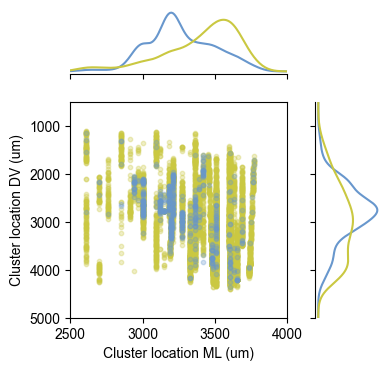

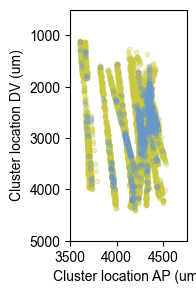

In [5]:

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(4,4), width_ratios=[1,0.3], height_ratios=[0.3,1], sharex='col', sharey='row')
ax[1,0].scatter(ngs_['coord_SCs_x']*-1, ngs_['coord_SCs_y'], color='#CAC841', alpha=0.3, s=10)
ax[1,0].scatter(gcs_['coord_SCs_x']*-1, gcs_['coord_SCs_y'], color='#6897CD', alpha=0.3,s=10)

# kde estimates 
x = np.arange(-5000, 5000, 10)
ax[0,0].plot(x, gaussian_kde(gcs_['coord_SCs_x']*-1, bw_method=0.3)(x), color='#6897CD')
ax[0,0].plot(x, gaussian_kde(ngs_['coord_SCs_x']*-1, bw_method=0.3)(x), color='#CAC841')
ax[1,1].plot(gaussian_kde(gcs_['coord_SCs_y'], bw_method=0.3)(x), x, color='#6897CD')
ax[1,1].plot(gaussian_kde(ngs_['coord_SCs_y'], bw_method=0.3)(x), x, color='#CAC841')
ax[0,1].axis('off')
ax[1,0].set_xlabel(f'Cluster location ML (um)')
ax[1,0].set_ylabel(f'Cluster location DV (um)')
ax[1,0].set_xlim(2500, 4000)
ax[1,0].set_xlim(2500, 4000)
ax[1,0].set_ylim(500, 5000)
ax[1,1].set_xticks([])
ax[0,0].set_yticks([])
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['left'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['bottom'].set_visible(False)
ax[1,0].invert_yaxis()
plt.show()

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(1.5,3))
scatter = ax.scatter(ngs_['coord_SCs_z'], ngs_['coord_SCs_y'], color='#CAC841', alpha=0.3, s=10)
scatter = ax.scatter(gcs_['coord_SCs_z'], gcs_['coord_SCs_y'], color='#6897CD', alpha=0.3, s=10)
ax.set_xlabel(f'Cluster location AP (um)')
ax.set_ylabel(f'Cluster location DV (um)')
ax.set_xlim(3500, 4750)
ax.set_ylim(500, 5000)
ax.invert_yaxis()
plt.show()

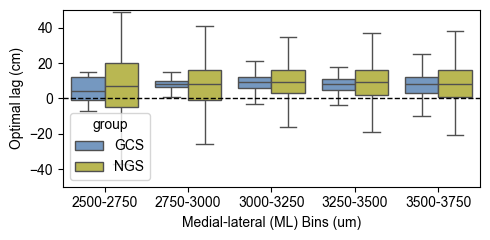

In [37]:
import seaborn as sns
gcs_df = gcs_.copy()
ngs_df = ngs_.copy()    

# Define bins and labels
bins = np.arange(2500, 4000, 250)
bins = np.append(bins, 3750)
bins = np.unique(bins)
labels = [f'{int(b)}-{int(b+250)}' for b in bins[:-1]]

# Bin the data
gcs_df['bin'] = pd.cut(gcs_df['coord_SCs_x']*-1, bins=bins, labels=labels, include_lowest=True)
ngs_df['bin'] = pd.cut(ngs_df['coord_SCs_x']*-1, bins=bins, labels=labels, include_lowest=True)

# Add group labels and reset index to avoid duplicate index issues
gcs_df['group'] = 'GCS'
ngs_df['group'] = 'NGS'
gcs_df.reset_index(drop=True, inplace=True)
ngs_df.reset_index(drop=True, inplace=True)

# Combine data for plotting
combined = pd.concat([gcs_df, ngs_df], ignore_index=True)

# Create a combined boxplot
plt.figure(figsize=(5, 2.5))
bp = sns.boxplot(data=combined, x='bin', y='optimal_travel_lag', 
            hue='group',palette={'GCS': '#6897CD', 'NGS': '#CAC841'}, showfliers=False)

for patch in bp.artists:
    patch.set_alpha(0.5)

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Medial-lateral (ML) Bins (um)')
plt.ylabel('Optimal lag (cm)')
plt.ylim(-50, 50)
plt.tight_layout()
plt.show()


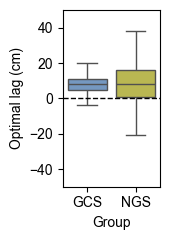

In [44]:
gcs_df = gcs_.copy()
ngs_df = ngs_.copy() 
# Add group labels
gcs_df['group'] = 'GCS'
ngs_df['group'] = 'NGS'

# Combine data
combined = pd.concat([gcs_df, ngs_df], ignore_index=True)

# Create boxplot
plt.figure(figsize=(1.8, 2.5))
sns.boxplot(data=combined, x='group', y='optimal_travel_lag', palette={'GCS': '#6897CD', 'NGS': '#CAC841'}, showfliers=False)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Group')
plt.ylabel('Optimal lag (cm)')
plt.ylim(-50, 50)
plt.tight_layout()
plt.show()


In [6]:
np.histogram(gcs_['coord_SCs_x']*-1, weights=gcs_['optimal_travel_lag'], bins=9, range=[2200, 4000])

(array([   0.,    0.,  100.,  200., 2048., 1394.,  302.,  644.,    0.]),
 array([2200., 2400., 2600., 2800., 3000., 3200., 3400., 3600., 3800.,
        4000.]))

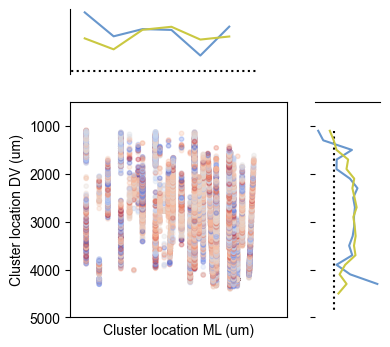

In [7]:
from matplotlib.colors import TwoSlopeNorm
norm = TwoSlopeNorm(vmin=-50, vcenter=0, vmax=50)

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(4,4), width_ratios=[1,0.3], height_ratios=[0.3,1], sharex='col', sharey='row')
ax[1,0].scatter(all_['coord_SCs_x']*-1, all_['coord_SCs_y'], c=all_['optimal_travel_lag'], alpha=0.3, s=10, cmap='coolwarm', norm=norm)

# g and ng estimates 
avg_g = np.histogram(gcs_['coord_SCs_x']*-1, weights=gcs_['optimal_travel_lag'], bins=9, range=[2200, 4000])[0]/np.histogram(gcs_['coord_SCs_x']*-1, bins=9, range=[2200, 4000])[0]
avg_ngs = np.histogram(ngs_['coord_SCs_x']*-1, weights=ngs_['optimal_travel_lag'], bins=9, range=[2200, 4000])[0]/np.histogram(ngs_['coord_SCs_x']*-1, bins=9, range=[2200, 4000])[0]
bin_centres = np.arange(2200, 4000, 200)

ax[0,0].plot(bin_centres, np.zeros(len(bin_centres)), color="#000000", linestyle='dotted')
ax[0,0].plot(bin_centres, avg_g, color='#6897CD')
ax[0,0].plot(bin_centres, avg_ngs, color='#CAC841')


avg_g = np.histogram(gcs_['coord_SCs_y'], weights=gcs_['optimal_travel_lag'], bins=20, range=[1000, 5000])[0]/np.histogram(gcs_['coord_SCs_y'], bins=20, range=[1000, 5000])[0]
avg_ngs = np.histogram(ngs_['coord_SCs_y'], weights=ngs_['optimal_travel_lag'], bins=20, range=[1000, 5000])[0]/np.histogram(ngs_['coord_SCs_y'], bins=20, range=[1000, 5000])[0]
bin_centres = np.arange(1100, 5000, 200)

ax[1,1].plot(np.zeros(len(bin_centres)), bin_centres, color="#000000", linestyle='dotted')
ax[1,1].plot(avg_g, bin_centres, color='#6897CD')
ax[1,1].plot(avg_ngs, bin_centres, color='#CAC841')

x = np.arange(-5000, 5000, 10)
ax[0,1].axis('off')
ax[1,0].set_xlabel(f'Cluster location ML (um)')
ax[1,0].set_ylabel(f'Cluster location DV (um)')
ax[1,0].set_xlim(2500, 4000)
ax[1,0].set_xlim(2500, 4000)
ax[1,0].set_ylim(500, 5000)
ax[1,1].set_xticks([])
ax[0,0].set_yticks([])
ax[0,0].set_xticks([])
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['bottom'].set_visible(False)
ax[1,1].spines['left'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['bottom'].set_visible(False)
ax[1,0].invert_yaxis()
plt.show()


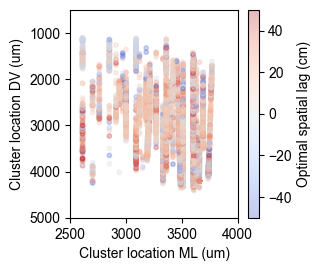

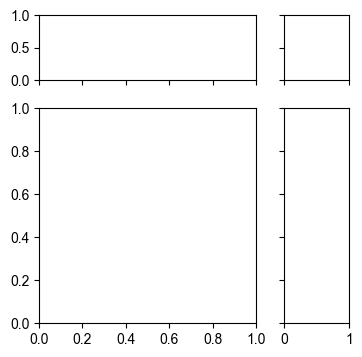

In [8]:
from matplotlib.colors import TwoSlopeNorm
norm = TwoSlopeNorm(vmin=-50, vcenter=0, vmax=50)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2.7,2.7))
scatter = ax.scatter(ngs_['coord_SCs_x']*-1, ngs_['coord_SCs_y'], c=ngs_['optimal_travel_lag'], alpha=0.3, s=10, cmap='coolwarm', norm=norm)
ax.scatter(gcs_['coord_SCs_x']*-1, gcs_['coord_SCs_y'], c=gcs_['optimal_travel_lag'], alpha=0.3, s=10, cmap='coolwarm', norm=norm)
ax.set_xlabel(f'Cluster location ML (um)')
ax.set_ylabel(f'Cluster location DV (um)')
ax.set_xlim(2500, 4000)
ax.set_ylim(500, 5000)
ax.invert_yaxis()
cbar = fig.colorbar(scatter, ax=ax, label='Optimal spatial lag (cm)')
plt.show()

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(4,4), width_ratios=[1,0.3], height_ratios=[0.3,1], sharex='col', sharey='row')



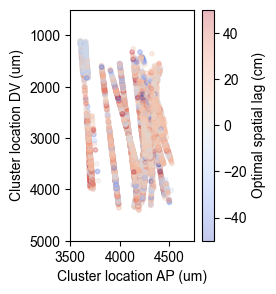

In [9]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2,3))
scatter = ax.scatter(ngs_['coord_SCs_z'], ngs_['coord_SCs_y'], c=ngs_['optimal_travel_lag'], alpha=0.3, s=10, cmap='coolwarm', norm=norm)
ax.scatter(gcs_['coord_SCs_z'], gcs_['coord_SCs_y'], c=gcs_['optimal_travel_lag'], alpha=0.3, s=10, cmap='coolwarm', norm=norm)
ax.set_xlabel(f'Cluster location AP (um)')
ax.set_ylabel(f'Cluster location DV (um)')
ax.set_xlim(3500, 4750)
ax.set_ylim(500, 5000)
ax.invert_yaxis()
cbar = fig.colorbar(scatter, ax=ax, label='Optimal spatial lag (cm)')
plt.show()

In [10]:
len(ngs_)

7964

In [11]:
len(gcs_)

582